In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [1]:
# Importing Libraries

In [4]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.layers import Dense,Activation,Dropout

In [5]:
#Data Preprocessing

In [6]:
num_classes=2
img_rows,img_cols=128,128
batch_size=32

In [7]:
train_data_dir="C:/Users/karki/Desktop/ML/ai project/fruitvsvegetable/train"
test_data_dir="C:/Users/karki/Desktop/ML/ai project/fruitvsvegetable/test"

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(
rescale=1./255,
rotation_range=30,
width_shift_range=0.3,
horizontal_flip=True,
fill_mode='nearest')

validation_datagen=ImageDataGenerator(rescale=1./255)


In [9]:
train_generator=train_datagen.flow_from_directory(
train_data_dir,
target_size=(img_rows,img_cols),
batch_size=batch_size,
class_mode='binary',
shuffle=True)

Found 500 images belonging to 2 classes.


In [10]:
validation_generator=validation_datagen.flow_from_directory(
test_data_dir,
target_size=(img_rows,img_cols),
batch_size=batch_size,
#label_mode='categorical'
class_mode='binary',

shuffle=True)

Found 50 images belonging to 2 classes.


In [11]:
model=Sequential()
model.add(Conv2D(64,(3,3),activation='relu',input_shape=[128,128,3]))
model.add(MaxPooling2D(pool_size=2,strides=2)) #strides is moving like window

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides=2))

#more than 2 times in above can reduceing can loose some data

model.add(Dropout(0.5)) # dropout helps to avoid overfitting

model.add(Flatten())

model.add(Dense(units=128,activation='relu'))    #128 means it have 128 neurons


# model.add(Dense(units=36,activation='softmax'))  #yo outpurs ma 36 because it have 366 classes so output should e in 36 

#output layers
model.add(Dense(1,activation='sigmoid'))
# activation='softmax'

C:\Users\karki\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [12]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       7,372,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,411,777 (28.27 MB)

 Trainable params: 7,411,777 (28.27 MB)

 Non-trainable params: 0 (0.00 B)

None


In [13]:
# #compiling and Training phase
# optimizer='rmsprop

In [14]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [15]:
history=model.fit(x=train_generator,validation_data=validation_generator,epochs=30)

Epoch 1/30


C:\Users\karki\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


16/16 ━━━━━━━━━━━━━━━━━━━━ 24s 998ms/step - accuracy: 0.5000 - loss: 1.2075 - val_accuracy: 0.5000 - val_loss: 0.6904
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 18s 803ms/step - accuracy: 0.5324 - loss: 0.6866 - val_accuracy: 0.5400 - val_loss: 0.6932
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.4868 - loss: 0.6934 - val_accuracy: 0.5200 - val_loss: 0.6789
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.5559 - loss: 0.6709 - val_accuracy: 0.6600 - val_loss: 0.6839
Epoch 5/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.5409 - loss: 0.6830 - val_accuracy: 0.5600 - val_loss: 0.6776
Epoch 6/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.6328 - loss: 0.6674 - val_accuracy: 0.6600 - val_loss: 0.6537
Epoch 7/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.6207 - loss: 0.6764 - val_accuracy: 0.7200 - val_loss: 0.6255
Epoch 8/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.6465 - loss: 0.6424 - val_accuracy: 0.6600 - val_loss: 0.63

In [16]:
#saving Model

In [17]:
model.save('trained_model.keras') #h5 is the extension to train the model

In [18]:
history.history #return dict of history

{'accuracy': [0.5080000162124634,
  0.527999997138977,
  0.5360000133514404,
  0.5680000185966492,
  0.5659999847412109,
  0.5979999899864197,
  0.6119999885559082,
  0.621999979019165,
  0.6759999990463257,
  0.6700000166893005,
  0.6340000033378601,
  0.6359999775886536,
  0.6700000166893005,
  0.6620000004768372,
  0.6679999828338623,
  0.6579999923706055,
  0.6779999732971191,
  0.6859999895095825,
  0.6520000100135803,
  0.6959999799728394,
  0.6899999976158142,
  0.7120000123977661,
  0.6919999718666077,
  0.7059999704360962,
  0.7260000109672546,
  0.699999988079071,
  0.7179999947547913,
  0.7099999785423279,
  0.7279999852180481,
  0.7260000109672546],
 'loss': [0.9778754711151123,
  0.6886582374572754,
  0.6918524503707886,
  0.6768622994422913,
  0.6849668622016907,
  0.6750717163085938,
  0.6773010492324829,
  0.657324492931366,
  0.6152042150497437,
  0.5948916077613831,
  0.6469254493713379,
  0.6404680609703064,
  0.6326546669006348,
  0.6139528751373291,
  0.61556416749

In [19]:
#Recording History

In [20]:
import json
with open('training-hist.json','w') as f:
    json.dump(history.history,f)

In [21]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [22]:
#calculating accuracy of model achieved on validation set

In [23]:
history.history['val_accuracy'][-1]  # it gives result of last val_accuracy

0.6600000262260437

In [24]:
#Training Visualization

In [29]:
epochs=[i for i in range(1,31)]

In [30]:
epochs


[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30]

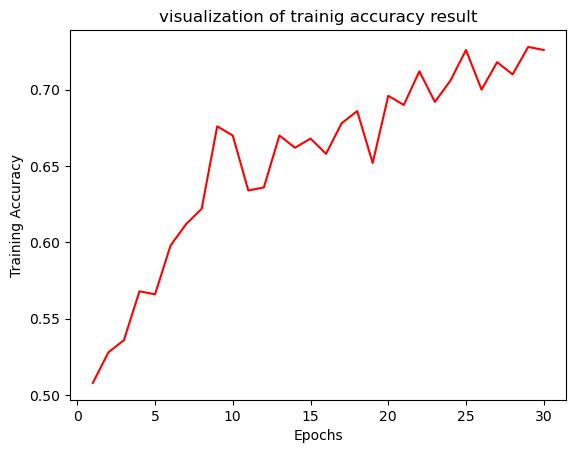

In [31]:
plt.plot(epochs,history.history['accuracy'],color="red")

plt.xlabel("Epochs")
plt.ylabel("Training Accuracy")
plt.title('visualization of trainig accuracy result')

plt.show()

In [26]:
#validation Accuracy

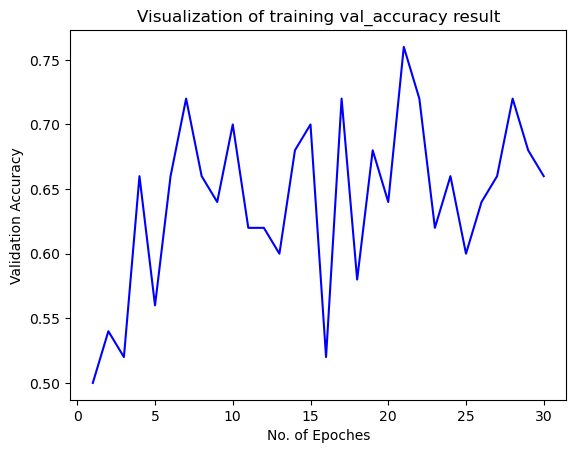

In [32]:
plt.plot(epochs,history.history['val_accuracy'],color="blue")
plt.xlabel("No. of Epoches")
plt.ylabel("Validation Accuracy")
plt.title("Visualization of training val_accuracy result")
plt.show()

In [33]:
#Importing Libraries

In [34]:
# #Connect to drive         --to get the train data from google drive and for further testing 
# from google.colab import drive
# drive.mount("/content/drive")

In [38]:
#Loading Model
# cnn=tf.keras.models.load_model('/content/trained_model.h5') #train model come into cnn 

In [39]:
#Visualization and Performing Prediction on single image

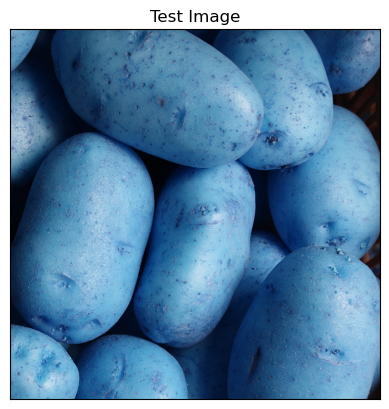

In [138]:
import cv2
image_path="C:/Users/karki/Desktop/ML/ai project/fruitvsvegetable/test/vegetables/254.jpg"
img=cv2.imread(image_path)     # helps to read this image
plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()

In [139]:
image=tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128)) #target size should be same as in time of pre processing or training 

In [140]:
#now convert this image into array form because our model only accept numerical value

In [141]:
threshold=0.6
input_arr=tf.keras.preprocessing.image.img_to_array(image)
#now convert input array into numpy array
input_arr=np.array([input_arr])                  #we are converting single image into 2 dimensional array(Batch)

In [142]:
predictions=model.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


In [143]:
print(predictions)  #confidense score of class

[[3.0269487e-16]]


In [144]:
if  predictions<=threshold:
    print('vegetables')
else:
    print('fruits')

vegetables


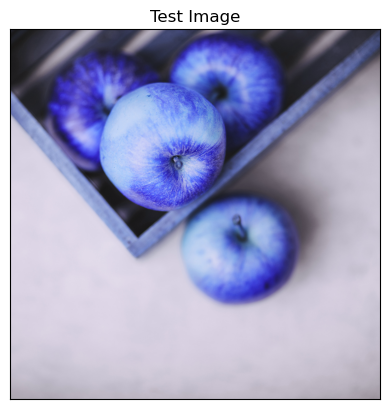

In [126]:
image_path="C:/Users/karki/Desktop/ML/ai project/fruitvsvegetable/test/fruits/252.jpg"
img=cv2.imread(image_path)     # helps to read this image
plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()

In [145]:
img_path='C:/Users/karki/Desktop/ML/ai project/fruitvsvegetable/test/fruits/252.jpg'

img2=tf.keras.preprocessing.image.load_img(img_path,target_size=(128,128))

image=tf.keras.preprocessing.image.img_to_array(img2)

input_i=np.array([image])

In [146]:
prediction2=model.predict(input_i)
print(prediction2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[[1.]]


In [147]:
if prediction2<=threshold:
    print('vegetables')
else:
    print('fruits')

fruits


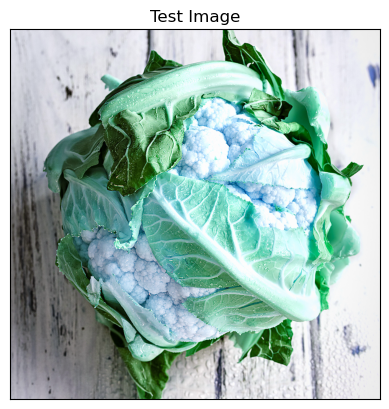

In [168]:
image_path="C:/Users/karki/Desktop/ML/ai project/fruitvsvegetable/test/vegetables/252.jpg"
img=cv2.imread(image_path)     # helps to read this image
plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()

In [169]:
img_path='C:/Users/karki/Desktop/ML/ai project/fruitvsvegetable/test/vegetables/252.jpg'

img2=tf.keras.preprocessing.image.load_img(img_path,target_size=(128,128))

image=tf.keras.preprocessing.image.img_to_array(img2)

input_i=np.array([image])

In [170]:
prediction2=model.predict(input_i)
print(prediction2)
if prediction2<=threshold:
    print('vegetables')
else:
    print('fruits')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
[[0.]]
vegetables


In [152]:
test_set=train_datagen.flow_from_directory(
'C:/Users/karki/Desktop/ML/ai project/fruitvsvegetable/test',
target_size=(img_rows,img_cols),
batch_size=batch_size,
class_mode='binary',
shuffle=True)

Found 50 images belonging to 2 classes.


In [54]:
# test_set.class_name

In [55]:
result=np.where(predictions[0]==max(predictions[0])) #it goes to each for comparision in categorical 
print(result)

(array([0], dtype=int64),)


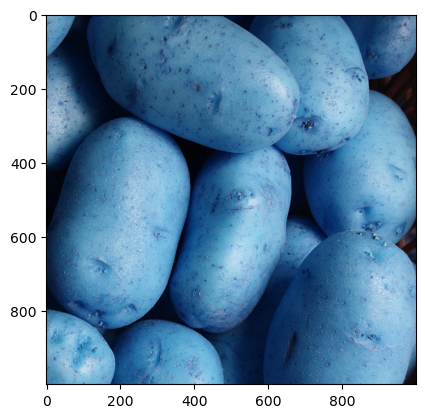

In [56]:
#Display image
plt.imshow(img)

In [ ]:
#single predictions
